# Primate Vocalization Detection Pipeline
## Reproducible End-to-End System

This notebook demonstrates a complete pipeline for detecting primate vocalizations in long audio recordings.

### Pipeline Overview:
1. **Configuration** - Set all parameters
2. **Data Loading** - Load species clips and background noise
3. **Preprocessing** - Convert to mel-spectrograms
4. **Data Augmentation** - Apply augmentation strategies
5. **Model Training** - Train VGG19-based classifier
6. **Detection** - Detect vocalizations in long audio files
7. **Analysis & Reporting** - Create visualizations and reports
8. **Hard Negative Mining** - Improve model by learning from mistakes (NEW!)
9. **Optional: Extract Clips** - Extract detected clips

### Key Features:
-  Modular design - easy to add new species
-  Configurable parameters - adjust without code changes
-  Reproducible results - fixed random seeds
-  GPU-accelerated - optimized for Google Colab
-  Iterative improvement - hard negative mining for better accuracy

## 0. Setup & Installation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!git clone https://github.com/Mo119m/primates-sound-detection.git
%cd primates-sound-detection

!pip install -q -r requirements.txt

import sys
sys.path.append('src')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cloning into 'primates-sound-detection'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 108 (delta 50), reused 69 (delta 28), pack-reused 0 (from 0)
Receiving objects: 100% (108/108), 89.17 KiB | 17.83 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/primates-sound-detection/primates-sound-detection


In [3]:
# Install required packages
!pip install -q librosa soundfile tensorflow scikit-learn pandas matplotlib

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

print("Setup complete")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Setup complete


## 1. Configuration

All parameters are defined in `config.py`. To add a new species or change parameters, simply edit the config file.

In [4]:
# Import all modules
import config
import data_loader
import preprocessing
import augmentation
import model as model_module
import train
import detection
import utils

# Print configuration summary
config.print_config_summary()

PRIMATE VOCALIZATION DETECTION - CONFIGURATION SUMMARY

 Data Paths:
   Audio Root: /content/drive/MyDrive/chimp-audio/audio
   Long Audio Root: /content/drive/MyDrive/chimp-audio/long_audio
   Output Root: /content/drive/MyDrive/chimp-audio/outputs

 Species to Detect (2):
   1. Cercocebus_torquatus <- Cercocebus torquatus hack 5s
   2. Colobus_guereza <- Colobus guereza Clips 5s

 Background Sources (2):
   1. background noise Clips 5sec
   2. wrong classified

 Audio Parameters:
   Sample Rate: 44100 Hz
   Clip Duration: 5.0s
   Window Size/Stride: 5.0s / 2.5s

 Mel-Spectrogram:
   N_FFT: 2048, Hop: 512
   Mel Bins: 128, Freq Range: 20-8000 Hz
   Target Image Size: 224x224x3

 Data Augmentation (Multiplier: 7x):
   original: 1
   background_noise_mix: 3
   time_chop: 1
   freq_chop: 1
   translate: 1

 Model:
   Architecture: VGG19
   Classes: 3 (Cercocebus_torquatus, Colobus_guereza, Background)
   Batch Size: 32, Epochs: 50
   Learning Rate: 0.0001, Dropout: 0.5

 Detection:
   Co

### To Add a New Species:

1. Add audio files to Google Drive: `chimp-audio/audio/new_species_folder/`
2. Edit `config.py` and add to `SPECIES_FOLDERS`:
   ```python
   SPECIES_FOLDERS = {
       'Cercocebus_torquatus': 'Cercocebus torquatus hack 5s',
       'Colobus_guereza': 'Colobus guereza Clips 5s',
       'New_Species': 'new_species_folder',  # ← Add this line
   }
   ```
3. Re-run the notebook - everything will automatically adjust!

## 2. Data Loading & Exploration

Load all audio files and verify the data.

In [5]:
# Load species data
species_data = data_loader.load_species_data()

# Load background data
background_data = data_loader.load_background_data()

# Print summary
data_loader.print_data_summary(species_data, background_data)


 Loading Species Data

 loading Cercocebus_torquatus...
   Found 181 files
   Loaded 50/181...
   Loaded 100/181...
   Loaded 150/181...
 Successfully loaded 181 clips

 loading Colobus_guereza...
   Found 172 files
   Loaded 50/172...
   Loaded 100/172...
   Loaded 150/172...
 Successfully loaded 172 clips

 Loading Background Data

 Loading from background noise Clips 5sec...
   Found 1008 files
   Loaded 50/1008...
   Loaded 100/1008...
   Loaded 150/1008...
   Loaded 200/1008...
   Loaded 250/1008...
   Loaded 300/1008...
   Loaded 350/1008...
   Loaded 400/1008...
   Loaded 450/1008...
   Loaded 500/1008...
   Loaded 550/1008...
   Loaded 600/1008...
   Loaded 650/1008...
   Loaded 700/1008...
   Loaded 750/1008...
   Loaded 800/1008...
   Loaded 850/1008...
   Loaded 900/1008...
   Loaded 950/1008...
   Loaded 1000/1008...
Successfully loaded 1008 clips

 Loading from wrong classified...
   Found 27 files
Successfully loaded 27 clips

 Total Background Samples: 1035
DATA LOADING

## 3. Complete Training Pipeline

This runs the entire training process:
- Data preprocessing
- Augmentation
- Model training
- Evaluation

PRIMATE VOCALIZATION DETECTION - TRAINING PIPELINE
PRIMATE VOCALIZATION DETECTION - CONFIGURATION SUMMARY

 Data Paths:
   Audio Root: /content/drive/MyDrive/chimp-audio/audio
   Long Audio Root: /content/drive/MyDrive/chimp-audio/long_audio
   Output Root: /content/drive/MyDrive/chimp-audio/outputs

 Species to Detect (2):
   1. Cercocebus_torquatus <- Cercocebus torquatus hack 5s
   2. Colobus_guereza <- Colobus guereza Clips 5s

 Background Sources (2):
   1. background noise Clips 5sec
   2. wrong classified

 Audio Parameters:
   Sample Rate: 44100 Hz
   Clip Duration: 5.0s
   Window Size/Stride: 5.0s / 2.5s

 Mel-Spectrogram:
   N_FFT: 2048, Hop: 512
   Mel Bins: 128, Freq Range: 20-8000 Hz
   Target Image Size: 224x224x3

 Data Augmentation (Multiplier: 7x):
   original: 1
   background_noise_mix: 3
   time_chop: 1
   freq_chop: 1
   translate: 1

 Model:
   Architecture: VGG19
   Classes: 3 (Cercocebus_torquatus, Colobus_guereza, Background)
   Batch Size: 32, Epochs: 50
   Lea

88/88 ━━━━━━━━━━━━━━━━━━━━ 36s 299ms/step - accuracy: 0.3454 - loss: 1.2357 - top_2_accuracy: 0.6807 - val_accuracy: 0.5712 - val_loss: 0.9939 - val_top_2_accuracy: 0.9259 - learning_rate: 1.0000e-04
Epoch 2/50
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4391 - loss: 1.0562 - top_2_accuracy: 0.7733
Epoch 2: val_accuracy improved from 0.57123 to 0.57977, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.4393 - loss: 1.0559 - top_2_accuracy: 0.7734 - val_accuracy: 0.5798 - val_loss: 0.9115 - val_top_2_accuracy: 0.9060 - learning_rate: 1.0000e-04
Epoch 3/50
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4928 - loss: 0.9845 - top_2_accuracy: 0.8185
Epoch 3: val_accuracy did not improve from 0.57977
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4931 - loss: 0.9841 - top_2_accuracy: 0.8187 - val_accuracy: 0.5769 - val_loss: 0.8308 - val_top_2_accuracy: 0.8974 - learning_rate: 1.0000e-04
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5649 - loss: 0.8882 - top_2_accuracy: 0.8697
Epoch 4: val_accuracy improved from 0.57977 to 0.73647, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5650 - loss: 0.8880 - top_2_accuracy: 0.8698 - val_accuracy: 0.7365 - val_loss: 0.7455 - val_top_2_accuracy: 0.9373 - learning_rate: 1.0000e-04
Epoch 5/50
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6333 - loss: 0.8144 - top_2_accuracy: 0.8933
Epoch 5: val_accuracy improved from 0.73647 to 0.78205, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6332 - loss: 0.8141 - top_2_accuracy: 0.8933 - val_accuracy: 0.7821 - val_loss: 0.6799 - val_top_2_accuracy: 0.9387 - learning_rate: 1.0000e-04
Epoch 6/50
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6702 - loss: 0.7586 - top_2_accuracy: 0.9148
Epoch 6: val_accuracy improved from 0.78205 to 0.79772, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6703 - loss: 0.7582 - top_2_accuracy: 0.9149 - val_accuracy: 0.7977 - val_loss: 0.6165 - val_top_2_accuracy: 0.9459 - learning_rate: 1.0000e-04
Epoch 7/50
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7110 - loss: 0.6943 - top_2_accuracy: 0.9342
Epoch 7: val_accuracy improved from 0.79772 to 0.81909, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7111 - loss: 0.6940 - top_2_accuracy: 0.9342 - val_accuracy: 0.8191 - val_loss: 0.5616 - val_top_2_accuracy: 0.9501 - learning_rate: 1.0000e-04
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7417 - loss: 0.6407 - top_2_accuracy: 0.9310
Epoch 8: val_accuracy improved from 0.81909 to 0.82906, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7417 - loss: 0.6405 - top_2_accuracy: 0.9310 - val_accuracy: 0.8291 - val_loss: 0.5076 - val_top_2_accuracy: 0.9601 - learning_rate: 1.0000e-04
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7819 - loss: 0.5678 - top_2_accuracy: 0.9533
Epoch 9: val_accuracy improved from 0.82906 to 0.86467, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7820 - loss: 0.5677 - top_2_accuracy: 0.9534 - val_accuracy: 0.8647 - val_loss: 0.4598 - val_top_2_accuracy: 0.9672 - learning_rate: 1.0000e-04
Epoch 10/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7987 - loss: 0.5337 - top_2_accuracy: 0.9583
Epoch 10: val_accuracy did not improve from 0.86467
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7988 - loss: 0.5335 - top_2_accuracy: 0.9583 - val_accuracy: 0.8604 - val_loss: 0.4361 - val_top_2_accuracy: 0.9701 - learning_rate: 1.0000e-04
Epoch 11/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8153 - loss: 0.4885 - top_2_accuracy: 0.9673
Epoch 11: val_accuracy improved from 0.86467 to 0.88177, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8155 - loss: 0.4883 - top_2_accuracy: 0.9673 - val_accuracy: 0.8818 - val_loss: 0.3849 - val_top_2_accuracy: 0.9729 - learning_rate: 1.0000e-04
Epoch 12/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8513 - loss: 0.4296 - top_2_accuracy: 0.9729
Epoch 12: val_accuracy improved from 0.88177 to 0.88889, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8513 - loss: 0.4295 - top_2_accuracy: 0.9729 - val_accuracy: 0.8889 - val_loss: 0.3468 - val_top_2_accuracy: 0.9758 - learning_rate: 1.0000e-04
Epoch 13/50
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8650 - loss: 0.3882 - top_2_accuracy: 0.9767
Epoch 13: val_accuracy improved from 0.88889 to 0.89744, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8650 - loss: 0.3883 - top_2_accuracy: 0.9766 - val_accuracy: 0.8974 - val_loss: 0.3223 - val_top_2_accuracy: 0.9786 - learning_rate: 1.0000e-04
Epoch 14/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8707 - loss: 0.3704 - top_2_accuracy: 0.9739
Epoch 14: val_accuracy improved from 0.89744 to 0.90456, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8708 - loss: 0.3703 - top_2_accuracy: 0.9740 - val_accuracy: 0.9046 - val_loss: 0.3006 - val_top_2_accuracy: 0.9815 - learning_rate: 1.0000e-04
Epoch 15/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8886 - loss: 0.3264 - top_2_accuracy: 0.9804
Epoch 15: val_accuracy did not improve from 0.90456
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8885 - loss: 0.3265 - top_2_accuracy: 0.9804 - val_accuracy: 0.8974 - val_loss: 0.3012 - val_top_2_accuracy: 0.9786 - learning_rate: 1.0000e-04
Epoch 16/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8839 - loss: 0.3180 - top_2_accuracy: 0.9760
Epoch 16: val_accuracy improved from 0.90456 to 0.90598, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8839 - loss: 0.3180 - top_2_accuracy: 0.9760 - val_accuracy: 0.9060 - val_loss: 0.2747 - val_top_2_accuracy: 0.9815 - learning_rate: 1.0000e-04
Epoch 17/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9024 - loss: 0.2940 - top_2_accuracy: 0.9847
Epoch 17: val_accuracy improved from 0.90598 to 0.91168, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9024 - loss: 0.2939 - top_2_accuracy: 0.9847 - val_accuracy: 0.9117 - val_loss: 0.2670 - val_top_2_accuracy: 0.9786 - learning_rate: 1.0000e-04
Epoch 18/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9049 - loss: 0.2878 - top_2_accuracy: 0.9809
Epoch 18: val_accuracy improved from 0.91168 to 0.91738, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9049 - loss: 0.2877 - top_2_accuracy: 0.9810 - val_accuracy: 0.9174 - val_loss: 0.2461 - val_top_2_accuracy: 0.9829 - learning_rate: 1.0000e-04
Epoch 19/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9112 - loss: 0.2687 - top_2_accuracy: 0.9819
Epoch 19: val_accuracy did not improve from 0.91738
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9112 - loss: 0.2685 - top_2_accuracy: 0.9819 - val_accuracy: 0.9145 - val_loss: 0.2377 - val_top_2_accuracy: 0.9886 - learning_rate: 1.0000e-04
Epoch 20/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9221 - loss: 0.2414 - top_2_accuracy: 0.9871
Epoch 20: val_accuracy improved from 0.91738 to 0.92023, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9221 - loss: 0.2415 - top_2_accuracy: 0.9871 - val_accuracy: 0.9202 - val_loss: 0.2356 - val_top_2_accuracy: 0.9829 - learning_rate: 1.0000e-04
Epoch 21/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9190 - loss: 0.2472 - top_2_accuracy: 0.9840
Epoch 21: val_accuracy improved from 0.92023 to 0.92450, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9190 - loss: 0.2472 - top_2_accuracy: 0.9840 - val_accuracy: 0.9245 - val_loss: 0.2243 - val_top_2_accuracy: 0.9858 - learning_rate: 1.0000e-04
Epoch 22/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9054 - loss: 0.2620 - top_2_accuracy: 0.9824
Epoch 22: val_accuracy improved from 0.92450 to 0.93020, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9056 - loss: 0.2617 - top_2_accuracy: 0.9824 - val_accuracy: 0.9302 - val_loss: 0.2158 - val_top_2_accuracy: 0.9886 - learning_rate: 1.0000e-04
Epoch 23/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9156 - loss: 0.2407 - top_2_accuracy: 0.9873
Epoch 23: val_accuracy did not improve from 0.93020
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9157 - loss: 0.2405 - top_2_accuracy: 0.9873 - val_accuracy: 0.9217 - val_loss: 0.2193 - val_top_2_accuracy: 0.9872 - learning_rate: 1.0000e-04
Epoch 24/50
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9249 - loss: 0.2079 - top_2_accuracy: 0.9858
Epoch 24: val_accuracy did not improve from 0.93020
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9249 - loss: 0.2079 - top_2_accuracy: 0.9858 - val_accuracy: 0.9274 - val_loss: 0.2076 - val_top_2_accuracy: 0.9829 - learning_rate: 1.0000e-04
Epoch 25/50
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9228 - loss: 0

88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9263 - loss: 0.2032 - top_2_accuracy: 0.9875 - val_accuracy: 0.9330 - val_loss: 0.2059 - val_top_2_accuracy: 0.9829 - learning_rate: 1.0000e-04
Epoch 30/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9397 - loss: 0.1859 - top_2_accuracy: 0.9896
Epoch 30: val_accuracy did not improve from 0.93305
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9397 - loss: 0.1858 - top_2_accuracy: 0.9897 - val_accuracy: 0.9259 - val_loss: 0.2180 - val_top_2_accuracy: 0.9758 - learning_rate: 1.0000e-04
Epoch 31/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9272 - loss: 0.1928 - top_2_accuracy: 0.9902
Epoch 31: val_accuracy improved from 0.93305 to 0.93447, saving model to /content/drive/MyDrive/chimp-audio/outputs/models/best_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9273 - loss: 0.1928 - top_2_accuracy: 0.9902 - val_accuracy: 0.9345 - val_loss: 0.1958 - val_top_2_accuracy: 0.9829 - learning_rate: 1.0000e-04
Epoch 32/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9437 - loss: 0.1710 - top_2_accuracy: 0.9907
Epoch 32: val_accuracy did not improve from 0.93447
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9436 - loss: 0.1711 - top_2_accuracy: 0.9907 - val_accuracy: 0.9288 - val_loss: 0.2013 - val_top_2_accuracy: 0.9815 - learning_rate: 1.0000e-04
Epoch 33/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9405 - loss: 0.1730 - top_2_accuracy: 0.9906
Epoch 33: val_accuracy did not improve from 0.93447
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9405 - loss: 0.1730 - top_2_accuracy: 0.9906 - val_accuracy: 0.9302 - val_loss: 0.1990 - val_top_2_accuracy: 0.9829 - learning_rate: 1.0000e-04
Epoch 34/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9265 - loss: 0

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9420 - loss: 0.1592 - top_2_accuracy: 0.9894 - val_accuracy: 0.9387 - val_loss: 0.1877 - val_top_2_accuracy: 0.9858 - learning_rate: 1.0000e-04
Epoch 37/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9440 - loss: 0.1597 - top_2_accuracy: 0.9935
Epoch 37: val_accuracy did not improve from 0.93875
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9440 - loss: 0.1597 - top_2_accuracy: 0.9935 - val_accuracy: 0.9330 - val_loss: 0.1913 - val_top_2_accuracy: 0.9829 - learning_rate: 1.0000e-04
Epoch 38/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9456 - loss: 0.1580 - top_2_accuracy: 0.9892
Epoch 38: val_accuracy did not improve from 0.93875
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9456 - loss: 0.1581 - top_2_accuracy: 0.9892 - val_accuracy: 0.9359 - val_loss: 0.1858 - val_top_2_accuracy: 0.9815 - learning_rate: 1.0000e-04
Epoch 39/50
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9465 - loss: 0

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9534 - loss: 0.1497 - top_2_accuracy: 0.9938 - val_accuracy: 0.9402 - val_loss: 0.1829 - val_top_2_accuracy: 0.9886 - learning_rate: 1.0000e-04
Epoch 41/50
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9469 - loss: 0.1636 - top_2_accuracy: 0.9909
Epoch 41: val_accuracy did not improve from 0.94017
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9469 - loss: 0.1634 - top_2_accuracy: 0.9909 - val_accuracy: 0.9402 - val_loss: 0.1772 - val_top_2_accuracy: 0.9900 - learning_rate: 1.0000e-04
Epoch 42/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9517 - loss: 0.1426 - top_2_accuracy: 0.9914
Epoch 42: val_accuracy did not improve from 0.94017
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9517 - loss: 0.1427 - top_2_accuracy: 0.9914 - val_accuracy: 0.9373 - val_loss: 0.1798 - val_top_2_accuracy: 0.9900 - learning_rate: 1.0000e-04
Epoch 43/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9489 - loss: 0

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9468 - loss: 0.1525 - top_2_accuracy: 0.9896 - val_accuracy: 0.9430 - val_loss: 0.1723 - val_top_2_accuracy: 0.9900 - learning_rate: 1.0000e-04
Epoch 46/50
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9571 - loss: 0.1330 - top_2_accuracy: 0.9951
Epoch 46: val_accuracy did not improve from 0.94302
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9570 - loss: 0.1331 - top_2_accuracy: 0.9950 - val_accuracy: 0.9373 - val_loss: 0.1820 - val_top_2_accuracy: 0.9843 - learning_rate: 1.0000e-04
Epoch 47/50
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9481 - loss: 0.1438 - top_2_accuracy: 0.9917
Epoch 47: val_accuracy did not improve from 0.94302
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9481 - loss: 0.1436 - top_2_accuracy: 0.9918 - val_accuracy: 0.9402 - val_loss: 0.1795 - val_top_2_accuracy: 0.9843 - learning_rate: 1.0000e-04
Epoch 48/50
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9534 - loss: 0

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9534 - loss: 0.1296 - top_2_accuracy: 0.9948 - val_accuracy: 0.9444 - val_loss: 0.1762 - val_top_2_accuracy: 0.9929 - learning_rate: 1.0000e-04
Epoch 49/50
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9491 - loss: 0.1400 - top_2_accuracy: 0.9954
Epoch 49: val_accuracy did not improve from 0.94444
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9492 - loss: 0.1399 - top_2_accuracy: 0.9954 - val_accuracy: 0.9345 - val_loss: 0.1828 - val_top_2_accuracy: 0.9829 - learning_rate: 1.0000e-04
Epoch 50/50
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9575 - loss: 0.1337 - top_2_accuracy: 0.9940
Epoch 50: val_accuracy did not improve from 0.94444

Epoch 50: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9575 - loss: 0.1336 - top_2_accuracy: 0.9940 - val_accuracy: 0.9359 - val_loss: 0.1865 - val_top_2_accuracy: 0.9843 - learning_rate: 1.0000e-04
Re

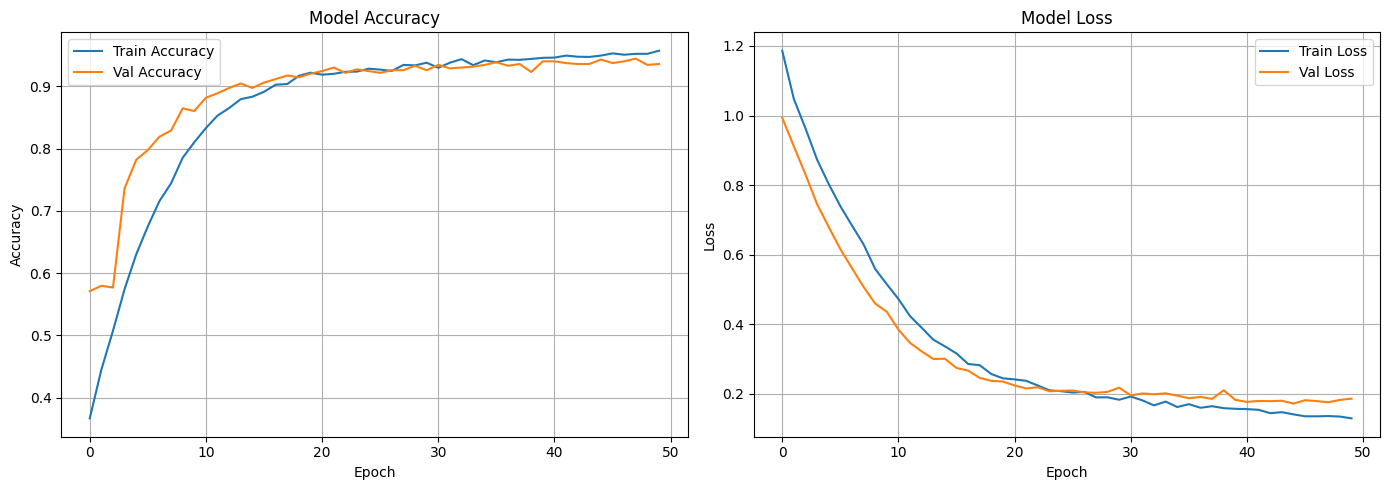

 TRAINING PIPELINE COMPLETED!


In [6]:
# Run complete training pipeline
trained_model = train.run_complete_training_pipeline()

## 4. Detection on Long Audio

Now we'll use the trained model to detect primate vocalizations in long audio files.

### 4.1 Test on First Long Audio File

In [7]:
import os
# Get list of long audio files
long_audio_files = data_loader.get_long_audio_files()

print(f"Found {len(long_audio_files)} long audio files:")
for i, file in enumerate(long_audio_files[:10], 1):  # Show first 10
    print(f"  {i}. {os.path.basename(file)}")
if len(long_audio_files) > 10:
    print(f"  ... and {len(long_audio_files) - 10} more")

Found 48 long audio files:


NameError: name 'os' is not defined

In [ ]:
# Detect in the first long audio file
import os

first_audio = long_audio_files[0]
print(f"Processing: {os.path.basename(first_audio)}")

detections_df = detection.detect_in_long_audio(
    trained_model,
    first_audio,
    confidence_threshold=config.DETECTION_CONFIDENCE_THRESHOLD
)

# Display results
print("\n Detection Results:")
if len(detections_df) > 0:
    display(detections_df.head(20))  # Show first 20 detections
else:
    print("No detections found.")

In [ ]:
# Save detections to CSV
csv_path = detection.save_detections(
    detections_df,
    os.path.basename(first_audio)
)
print(f"Detections saved to: {csv_path}")

### 4.2 Visualize Detection Results

In [ ]:
# Create visualization
utils.visualize_detection_results(
    first_audio,
    detections_df,
    save_path=None,  # Set to path to save, None to just display
    show_spectrogram=True
)

### 4.3 Process All Long Audio Files

In [ ]:
# Process all long audio files
# Comment out this cell if you only want to process the first file

all_detections = detection.process_all_long_audio_files(
    trained_model,
    confidence_threshold=config.DETECTION_CONFIDENCE_THRESHOLD
)

## 5. Analysis & Reporting

In [ ]:
# Print detection statistics
utils.print_detection_statistics(all_detections)

In [ ]:
# Create summary report
summary_path = os.path.join(config.DETECTION_OUTPUT_DIR, 'detection_summary.csv')
summary_df = utils.create_detection_summary_report(all_detections, summary_path)

print("\n Summary Report:")
display(summary_df)

In [ ]:
# Create visualizations for all files
utils.visualize_all_detections(all_detections)

## 6. Hard Negative Mining - Model Improvement (**uncertain now**)

### What is Hard Negative Mining?

If notice many **false positives** (e.g., bird calls being classified as primate calls), you can use this to improve your model.

**The Process:**
1. Extract samples where the model is uncertain (medium confidence 0.5-0.85)
2. Manually verify which are false positives
3. Add verified false positives as "hard negatives" to training data
4. Retrain the model

**Result:** Model learns to distinguish between commonly confused sounds (e.g., bird calls vs primate calls)

### When to Use This?

- After initial training and detection
- When you see many bird calls or environmental sounds misclassified
- When one species is heavily over-represented in detections
- To improve model precision on real-world recordings

### 6.1 Run Hard Negative Mining Script

In [ ]:
# Run hard negative mining
exec(open('run_hard_negative_mining.py').read())

### 6.2 Manual Verification (Critical Step!)

**IMPORTANT: You must do this manually in Google Drive!**

#### Instructions:

1. **Go to Google Drive**: `chimp-audio/audio/hard_negative_candidates/`

2. **Listen to each audio file**

3. **Make a decision for each file:**
   - **DELETE** if it's an actual primate call (model is correct)
   - **KEEP** if it's NOT a primate call (bird, insect, rain, wind, etc.)

4. **Create new folder**: `chimp-audio/audio/verified_hard_negatives/`

5. **MOVE** all kept files to `verified_hard_negatives/`

#### What to Expect:
- **Examples of what to keep**: Bird calls, insect sounds, rain, wind, rustling leaves
- **Examples of what to delete**: Actual primate vocalizations


**PAUSE HERE and complete the manual verification before continuing!**

### 6.3 Update Configuration

After you've verified and organized the files, update `config.py` to include the new hard negatives folder.

In [ ]:
# Check if verified_hard_negatives folder exists
import os
verified_folder = os.path.join(config.AUDIO_ROOT, 'verified_hard_negatives')

if os.path.exists(verified_folder):
    file_count = len([f for f in os.listdir(verified_folder) if f.endswith('.wav')])
    print(f"Found verified_hard_negatives folder with {file_count} files")
    print("\nNow edit config.py manually!")
    print("\nAdd to BACKGROUND_FOLDERS (around line 28-32):")
    print("\nThen run the next cell to reload config.")
else:
    print(" verified_hard_negatives folder not found!")
    print("\nPlease:")
    print("1. Go to Google Drive: chimp-audio/audio/")
    print("2. Create folder: verified_hard_negatives/")
    print("3. Move verified files from hard_negative_candidates/ to verified_hard_negatives/")
    print("4. Run this cell again")

In [ ]:
# Reload config after editing
import importlib
importlib.reload(config)

# Verify new folder is recognized
print("Updated Configuration:")
config.print_config_summary()

# Load updated data
background_data_updated = data_loader.load_background_data()
print(f"\n Total background samples: {len(background_data_updated)}")

### 6.4 Retrain with Hard Negatives

Now retrain the model with the expanded background dataset that includes verified hard negatives.

In [ ]:
# Train improved model
improved_model = train.run_complete_training_pipeline()

### 6.5 Compare Results

Test the improved model on the same audio file and compare with original results.

In [ ]:
# Run detection with improved model
print(f"Testing improved model on: {os.path.basename(first_audio)}\n")

improved_detections = detection.detect_in_long_audio(
    improved_model,
    first_audio,
    confidence_threshold=config.DETECTION_CONFIDENCE_THRESHOLD
)

# Compare

print(f"\nOriginal model detections: {len(detections_df)}")
print(f"Improved model detections: {len(improved_detections)}")
print(f"Change: {len(improved_detections) - len(detections_df)} ({(len(improved_detections)/len(detections_df)-1)*100:.1f}%)")

if len(detections_df) > 0:
    print("\n Original Distribution:")
    print(detections_df['species'].value_counts())

if len(improved_detections) > 0:
    print("\n Improved Distribution:")
    print(improved_detections['species'].value_counts())

    print("\n Average Confidence:")
    print(f"Original: {detections_df['confidence'].mean():.4f}")
    print(f"Improved: {improved_detections['confidence'].mean():.4f}")

In [ ]:
# Visualize improved results
utils.visualize_detection_results(
    first_audio,
    improved_detections,
    save_path=None,
    show_spectrogram=True
)

### 6.6 Save Improved Model (Optional)

If you're satisfied with the improved results, save this model with a descriptive name.

In [ ]:
# Save improved model with descriptive name
improved_model_path = os.path.join(config.MODEL_SAVE_DIR, 'model_v2_with_hard_negatives.h5')
improved_model.save(improved_model_path)

print(f" Improved model saved to: {improved_model_path}")

### 6.7 Process All Files with Improved Model (Optional)

Once satisfied with the improved model, process all long audio files again.

In [ ]:
# Process all files with improved model
all_detections_improved = detection.process_all_long_audio_files(
    improved_model,
    confidence_threshold=config.DETECTION_CONFIDENCE_THRESHOLD
)

# Generate new reports
utils.print_detection_statistics(all_detections_improved)

summary_improved_path = os.path.join(config.DETECTION_OUTPUT_DIR, 'detection_summary_v2.csv')
summary_improved_df = utils.create_detection_summary_report(all_detections_improved, summary_improved_path)

print(f"\n Improved summary saved to: {summary_improved_path}")

## 7. Extract Detected Clips

Extract audio clips for each detection for manual validation.

In [ ]:
# Extract clips from first audio file
clips_output_dir = os.path.join(config.OUTPUT_ROOT, 'detected_clips')

# Choose which detections to extract:
# Use 'improved_detections' if you've done hard negative mining
# Use 'detections_df' for original model results

detections_to_extract = improved_detections if 'improved_detections' in locals() else detections_df

if len(detections_to_extract) > 0:
    utils.extract_detected_audio_clips(
        first_audio,
        detections_to_extract,
        clips_output_dir,
        padding=0.5  # Add 0.5s padding around each detection
    )
else:
    print("No detections to extract.")

## 8. Model Persistence

The best model is automatically saved during training. You can also manually save/load models.

In [ ]:
# Best model was saved during training
best_model_path = os.path.join(config.MODEL_SAVE_DIR, 'best_model.h5')
print(f"Best model saved at: {best_model_path}")

# If you did hard negative mining, you also have:
if os.path.exists(improved_model_path):
    print(f"Improved model (v2) saved at: {improved_model_path}")

# To load a model later:
# loaded_model = model_module.load_trained_model(best_model_path)

## 9. Adjust Detection Threshold (Optional)

If you want to experiment with different confidence thresholds without retraining:

In [ ]:
# Try different thresholds
thresholds = [0.5, 0.7, 0.9]

# Use improved model if available, otherwise use original
test_model = improved_model if 'improved_model' in locals() else trained_model

for threshold in thresholds:
    print(f"Testing threshold: {threshold}")

    detections = detection.detect_in_long_audio(
        test_model,
        first_audio,
        confidence_threshold=threshold
    )

    print(f"\nFound {len(detections)} detections with threshold {threshold}")
    if len(detections) > 0:
        print(detections['species'].value_counts())

## Summary

### Output Files Generated:

```
drive/MyDrive/chimp-audio/outputs/
├── models/
│   ├── best_model.h5              # Initial trained model
│   ├── model_v2_with_hard_negatives.h5  # Improved model (if you did hard negative mining)
│   ├── training_history.json      # Training metrics
│   └── training_history.png       # Training curves
├── detections/
│   ├── *_detections.csv           # Detection results (CSV)
│   ├── detection_summary.csv      # Overall summary (v1)
│   └── detection_summary_v2.csv   # Overall summary (v2, if improved)
├── visualizations/
│   └── *_visualization.png        # Waveform/spectrogram plots
└── detected_clips/
    └── *.wav                      # Extracted audio clips
```

### Workflow Summary:

**Standard workflow:**
1. Setup → Configure → Load Data → Train → Detect → Analyze

**With Hard Negative Mining (Recommended):**
1. Setup → Configure → Load Data → Train → Detect → Analyze
2. **Hard Negative Mining** → Manual Verification → Update Config → Retrain
3. Compare Results → Use Improved Model for Production

### To Add New Species or Data:

1. Add new audio files to appropriate folders in Google Drive
2. Update `config.py` (add to `SPECIES_FOLDERS` or `BACKGROUND_FOLDERS`)
3. Re-run this notebook

### Next Steps:

- **If results are good**: Process all files and generate final reports
- **If too many false positives**: Use Hard Negative Mining (Section 6)
- **If adding new data**: Update config and retrain
- **For production use**: Save improved model and document threshold settings